In [1]:
import pandas as pd

In [2]:
teams = pd.read_csv("teams.csv")

In [9]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [13]:
import seaborn as sns

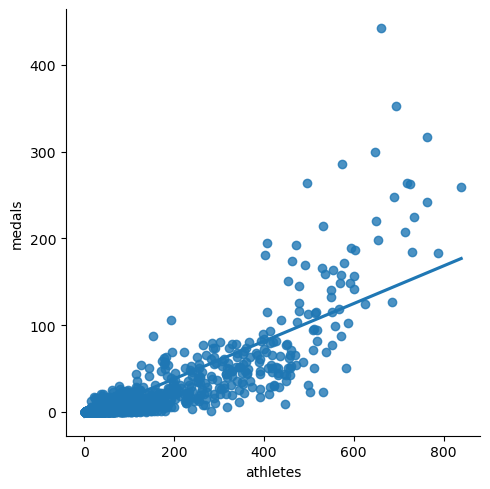

In [15]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True,ci=None)

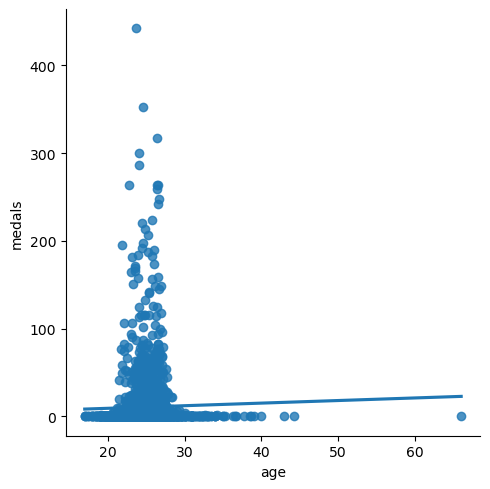

In [17]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

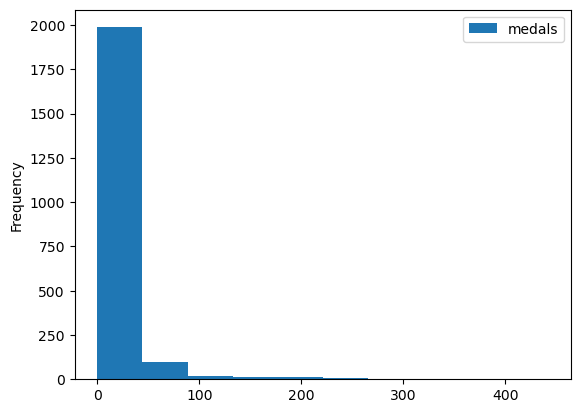

In [18]:
teams.plot.hist(y="medals")

In [19]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [22]:
teams=teams.dropna()

In [21]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [24]:
train = teams[teams["year"] <2012].copy()
test = teams[teams["year"] >=2012].copy()

In [25]:
train.shape

(1609, 7)

In [26]:
test.shape

(405, 7)

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [30]:
predictors = ["athletes", "prev_medals"]
target= "medals"

In [32]:
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [34]:
predictions = reg.predict(test[predictors])

In [35]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [36]:
test["predictions"] = predictions

In [37]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [41]:
test.loc[test["predictions"] < 0, "predictions"] =0

In [43]:
test["predictions"]= test["predictions"].round()

In [44]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [45]:
test.head(13)

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
38,ALG,Algeria,2016,74,24.0,1.0,2,4.0
48,AND,Andorra,2012,6,32.0,0.0,0,0.0
49,AND,Andorra,2016,4,26.0,0.0,0,0.0
57,ANG,Angola,2012,35,26.4,0.0,0,0.0
58,ANG,Angola,2016,26,27.5,0.0,0,0.0


In [49]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"], test["predictions"])

In [50]:
error

3.2987654320987656

In [51]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [52]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [54]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [56]:
errors = (test["medals"] - test["predictions"]).abs()

In [57]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [60]:
error_by_team = errors.groupby(test["team"]).mean()

In [62]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [66]:
error_ratio= error_by_team/ medals_by_team

In [68]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [69]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [71]:
import numpy as np 
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [72]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

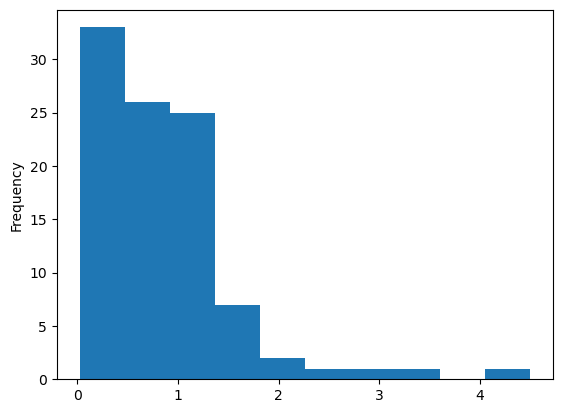

In [73]:
error_ratio.plot.hist()

In [74]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64